In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
import plotly.express as px
import plotly.graph_objects as go


In [3]:
def wrangle(filename):
    df = pd.read_csv(filename)
    mask_apt = df['property_type'] == 'apartment'
    mask_cf = df['place_with_parent_names'].str.contains('Capital Federal')
    mask_usd = df['price_aprox_usd'] < 400_000

    #remove outliers for surface_covered_in_m2
    low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
    mask_area = df['surface_covered_in_m2'].between(low, high)
    df = df[mask_apt & mask_cf & mask_usd & mask_area]
    #working with lat-lon
    df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True).astype(float)
    df.drop(columns=['lat-lon'], inplace=True)

    return df

In [4]:
df = wrangle(r'D:\python_mastery\machine_learning\world quant university\housing buenos aires\buenos-aires-real-estate-1.csv')
df.shape

(1413, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 0 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1413 non-null   object 
 1   property_type               1413 non-null   object 
 2   place_with_parent_names     1413 non-null   object 
 3   price                       1413 non-null   float64
 4   currency                    1413 non-null   object 
 5   price_aprox_local_currency  1413 non-null   float64
 6   price_aprox_usd             1413 non-null   float64
 7   surface_total_in_m2         1008 non-null   float64
 8   surface_covered_in_m2       1413 non-null   float64
 9   price_usd_per_m2            969 non-null    float64
 10  price_per_m2                1413 non-null   float64
 11  floor                       400 non-null    float64
 12  rooms                       1151 non-null   float64
 13  expenses                    380 non-nu

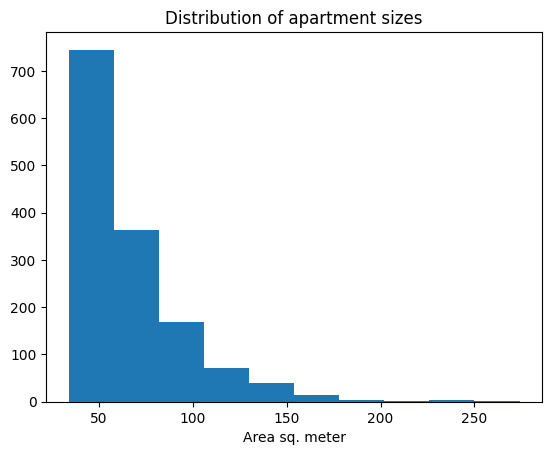

In [6]:
#create a histogram
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area sq. meter')
plt.title('Distribution of apartment sizes');

In [7]:
df.describe()['surface_covered_in_m2']

count    1413.000000
mean       64.828733
std        30.411327
min        34.000000
25%        43.000000
50%        56.000000
75%        77.000000
max       274.000000
Name: surface_covered_in_m2, dtype: float64

In [8]:
#remove outliers by using quantile
low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
mask_area = df['surface_covered_in_m2'].between(low, high)


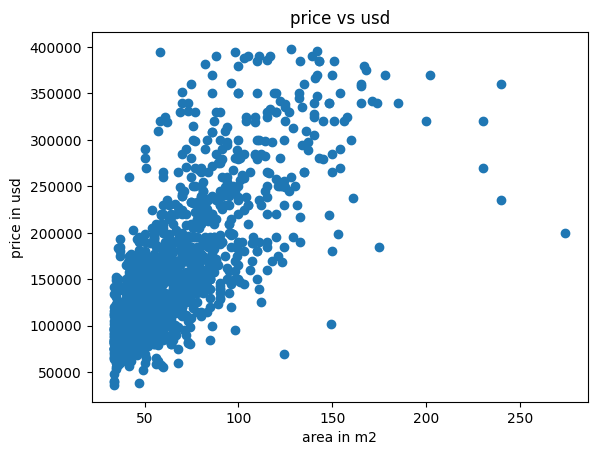

In [9]:
plt.scatter(x=df['surface_covered_in_m2'], y=df['price_aprox_usd'])
plt.xlabel('area in m2')
plt.ylabel('price in usd')
plt.title('price vs usd');

In [10]:
features = ['surface_covered_in_m2']
X = df[features]
X.shape

(1413, 1)

In [11]:
target = df['price_aprox_usd']
Y = target
Y.shape

(1413,)

In [12]:
mean = Y.mean()
mean

154146.39659589526

In [13]:
y_pred_baseline = [mean] * len(Y)
len(y_pred_baseline)

1413

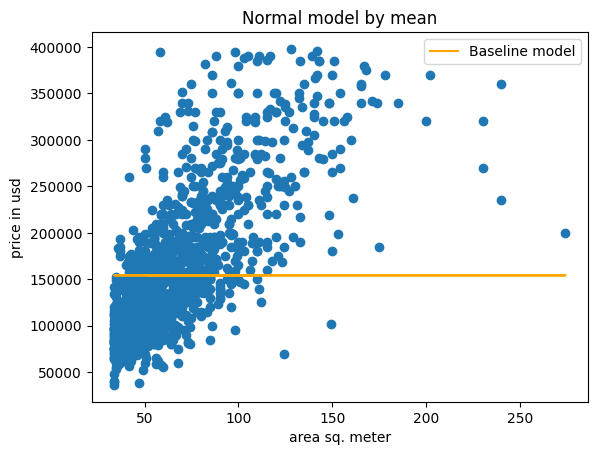

In [14]:
plt.plot(X, y_pred_baseline, color="orange", label="Baseline model")
plt.scatter(x=X, y=Y)
plt.xlabel("area sq. meter")
plt.ylabel("price in usd")
plt.title('Normal model by mean')
plt.legend();

In [15]:
mae = mean_absolute_error(Y, y_pred_baseline)
mae  #mae should be below this value in order to be useful

58440.38011462665

In [16]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [17]:
new_y = model.predict(X)

In [18]:
new_mae = mean_absolute_error(Y, new_y)
new_mae

35938.72616462

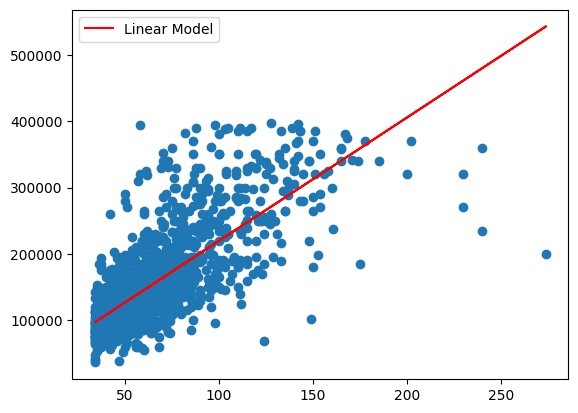

In [19]:
plt.plot(X, new_y, color="red", label="Linear Model")
plt.scatter(X, Y)
plt.legend();

In [20]:
intercept = round(model.intercept_, 2)
intercept

33660.77

In [21]:
coefficient = round(model.coef_[0], 2)
coefficient

1858.52

In [22]:
print(f"Equation = {intercept} + {coefficient} * surface_covered")

Equation = 33660.77 + 1858.52 * surface_covered


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 0 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1413 non-null   object 
 1   property_type               1413 non-null   object 
 2   place_with_parent_names     1413 non-null   object 
 3   price                       1413 non-null   float64
 4   currency                    1413 non-null   object 
 5   price_aprox_local_currency  1413 non-null   float64
 6   price_aprox_usd             1413 non-null   float64
 7   surface_total_in_m2         1008 non-null   float64
 8   surface_covered_in_m2       1413 non-null   float64
 9   price_usd_per_m2            969 non-null    float64
 10  price_per_m2                1413 non-null   float64
 11  floor                       400 non-null    float64
 12  rooms                       1151 non-null   float64
 13  expenses                    380 non-nu

In [24]:
df1 = wrangle(r'D:\python_mastery\machine_learning\world quant university\housing buenos aires\buenos-aires-real-estate-2.csv')
df1.shape

(1375, 17)

In [25]:
dff = pd.concat([df, df1], ignore_index=True)
dff.shape

(2788, 17)

In [26]:
fig = px.scatter_mapbox(
    dff,  # Our DataFrame
    lat='lat',
    lon='lon',
    width=600,  # Width of map
    height=600,  # Height of map
    color='price_aprox_usd',
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [27]:
# # Create 3D scatter plot
# fig = px.scatter_3d(
#     df,
#     x='lon',
#     y='lat',
#     z='price_aprox_usd',
#     labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
#     width=600,
#     height=500,
# )

# # Refine formatting
# fig.update_traces(
#     marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
#     selector={"mode": "markers"},
# )

# # Display figure
# fig.show()

In [28]:
features1 = ['lat', 'lon']
xt = dff[features1]
xt.shape

(2788, 2)

In [29]:
target = ['price_aprox_usd']
yt = dff[target]
yt.shape

(2788, 1)

In [30]:
mean1 = yt.mean()

In [31]:
y_pred_baseline1 = [mean1] * len(yt)

In [43]:
base_mae = mean_absolute_error(yt, y_pred_baseline1)
base_mae

58958.12063234472

In [33]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2788 non-null   object 
 1   property_type               2788 non-null   object 
 2   place_with_parent_names     2788 non-null   object 
 3   price                       2788 non-null   float64
 4   currency                    2788 non-null   object 
 5   price_aprox_local_currency  2788 non-null   float64
 6   price_aprox_usd             2788 non-null   float64
 7   surface_total_in_m2         1964 non-null   float64
 8   surface_covered_in_m2       2788 non-null   float64
 9   price_usd_per_m2            1880 non-null   float64
 10  price_per_m2                2788 non-null   float64
 11  floor                       830 non-null    float64
 12  rooms                       2276 non-null   float64
 13  expenses                    747 n

In [34]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(xt)

SimpleImputer()

In [35]:
#transformed column
tc = imputer.transform(xt)

In [36]:
pd.DataFrame(tc, columns=xt.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     2788 non-null   float64
 1   lon     2788 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


In [38]:
model = make_pipeline(
    SimpleImputer(),
    LinearRegression(),
)

In [40]:
model.fit(xt, yt)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [42]:
prediction = model.predict(xt)

In [44]:
new_mae = mean_absolute_error(yt, prediction)
new_mae

55720.94335554401

In [53]:
new_data = pd.DataFrame({'lat': [-34.60], 'lon': [-58.38]})
price_prediction = model.predict(new_data)
price_prediction[0]

array([170569.65569741])